# Problem: Implement a linear regression model to predict the prices of houses based on the square footage and number of bedrooms and bathrooms.

# Loading the DataSet

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/padopadi/CODECRAFT_ML_02/refs/heads/main/Mall_Customers.csv')

In [2]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.shape

(200, 5)

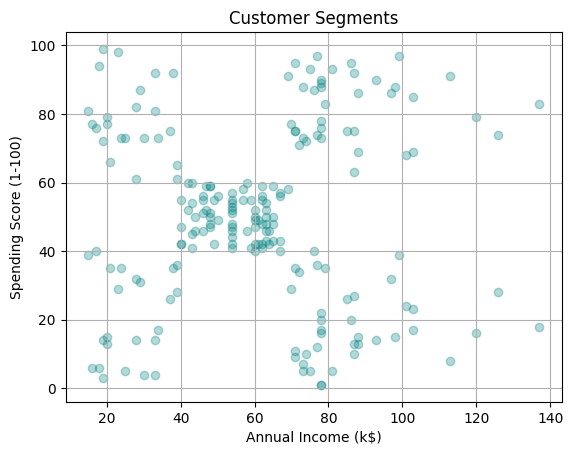

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='teal', alpha=0.3)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid()
plt.show()


# Model Building

## Elbow Meathod(KMeans)

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

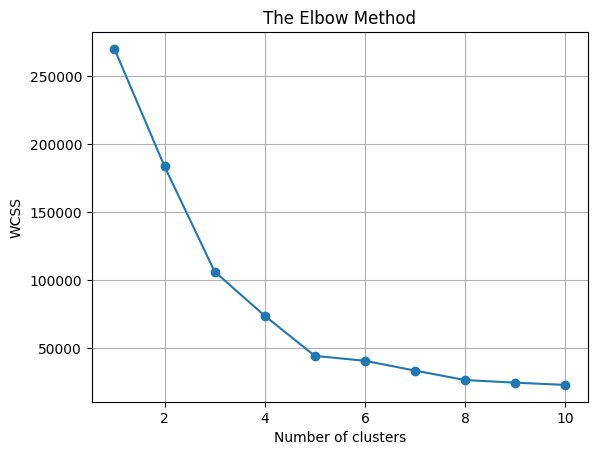

In [7]:
from sklearn.cluster import KMeans
wcss = []


elbow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


## K -Means

In [8]:
km = KMeans(n_clusters=5, random_state=100)
cluster_pred = km.fit_predict(X)

In [9]:
cluster_pred

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1], dtype=int32)

**Result**

In [10]:
df['cluter'] = cluster_pred

In [11]:
df.head()
df['cluter'] = cluster_pred
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluter
0,1,Male,19,15,39,3
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,3


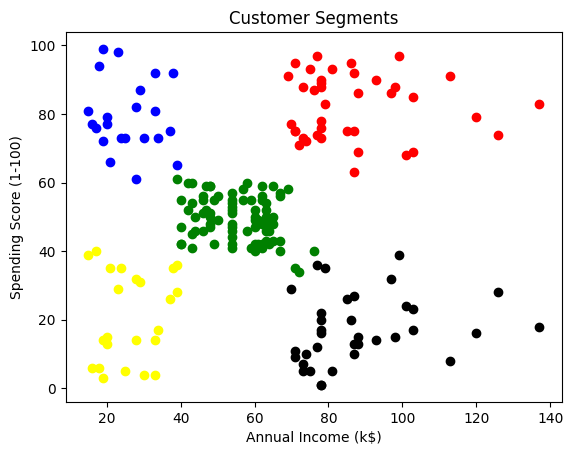

In [12]:
df1 = df[df['cluter'] == 0]
df2 = df[df['cluter'] == 1]
df3 = df[df['cluter'] == 2]
df4 = df[df['cluter'] == 3]
df5 = df[df['cluter'] == 4]
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='blue')
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='yellow')
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='black')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Scaling**

## Setting the scale

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluter
0,1,Male,19,0.000000,0.387755,3
1,2,Male,21,0.000000,0.816327,2
2,3,Female,20,0.008197,0.051020,3
3,4,Female,23,0.008197,0.775510,2
4,5,Female,31,0.016393,0.397959,3
...,...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918,1
196,197,Female,45,0.909836,0.275510,4
197,198,Male,32,0.909836,0.744898,1
198,199,Male,32,1.000000,0.173469,4


## Scalled Visualization(Scatter Plot)

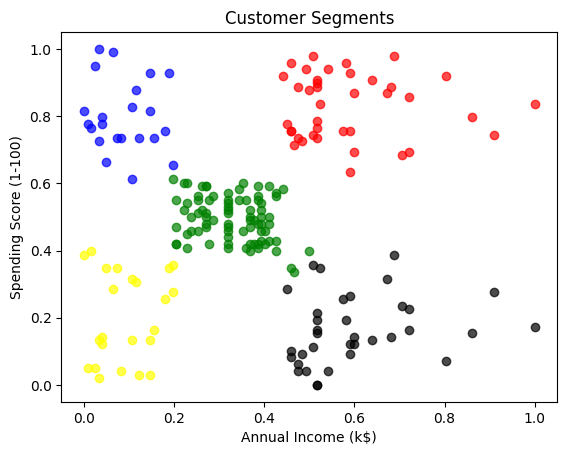

In [15]:
df1 = df[df['cluter'] == 0]
df2 = df[df['cluter'] == 1]
df3 = df[df['cluter'] == 2]
df4 = df[df['cluter'] == 3]
df5 = df[df['cluter'] == 4]
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], color='green', alpha = 0.7)
plt.scatter(df2['Annual Income (k$)'], df2['Spending Score (1-100)'], color='red' ,alpha = 0.7)
plt.scatter(df3['Annual Income (k$)'], df3['Spending Score (1-100)'], color='blue',alpha = 0.7)
plt.scatter(df4['Annual Income (k$)'], df4['Spending Score (1-100)'], color='yellow',alpha = 0.7)
plt.scatter(df5['Annual Income (k$)'], df5['Spending Score (1-100)'], color='black',alpha = 0.7)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()